# Realizando algumas importações...

In [1]:
#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
#Pandas
import pandas as pd
#Estilo visual
sns.set(style='whitegrid')

# Importando o dataset diretamente do Kaggle

In [4]:
#Importando um dataset diretamente do kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("khushikyad001/impact-of-screen-time-on-mental-health")

print("Path to dataset files:", path)



Path to dataset files: /kaggle/input/impact-of-screen-time-on-mental-health


In [5]:
df = pd.read_csv('/kaggle/input/impact-of-screen-time-on-mental-health/digital_diet_mental_health.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2000 non-null   object 
 1   age                               2000 non-null   int64  
 2   gender                            2000 non-null   object 
 3   daily_screen_time_hours           2000 non-null   float64
 4   phone_usage_hours                 2000 non-null   float64
 5   laptop_usage_hours                2000 non-null   float64
 6   tablet_usage_hours                2000 non-null   float64
 7   tv_usage_hours                    2000 non-null   float64
 8   social_media_hours                2000 non-null   float64
 9   work_related_hours                2000 non-null   float64
 10  entertainment_hours               2000 non-null   float64
 11  gaming_hours                      2000 non-null   float64
 12  sleep_

In [ ]:
df.head()

,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,...,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,...,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,...,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,...,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,...,7,3.0,Urban,64,1,1,217.5,8,10,0.0


In [7]:
import os

# O caminho da pasta que você obteve do kagglehub
pasta_dataset = path[0] if isinstance(path, list) else path

# Listar todos os arquivos e subdiretórios dentro da pasta
arquivos = os.listdir(pasta_dataset)
print("Arquivos encontrados na pasta do dataset:", arquivos)

Arquivos encontrados na pasta do dataset: ['digital_diet_mental_health.csv']


# Tempo de tela x score de saúde mental

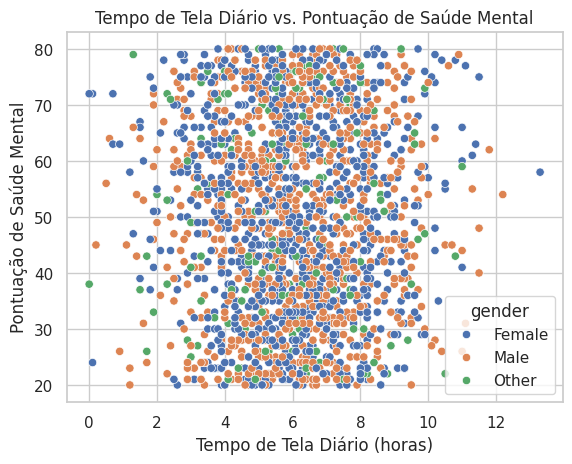

In [8]:
sns.scatterplot(x='daily_screen_time_hours', y='mental_health_score', hue='gender', data=df)
plt.title('Tempo de Tela Diário vs. Pontuação de Saúde Mental')
plt.xlabel('Tempo de Tela Diário (horas)')
plt.ylabel('Pontuação de Saúde Mental')
plt.show()

# Matriz de correlação

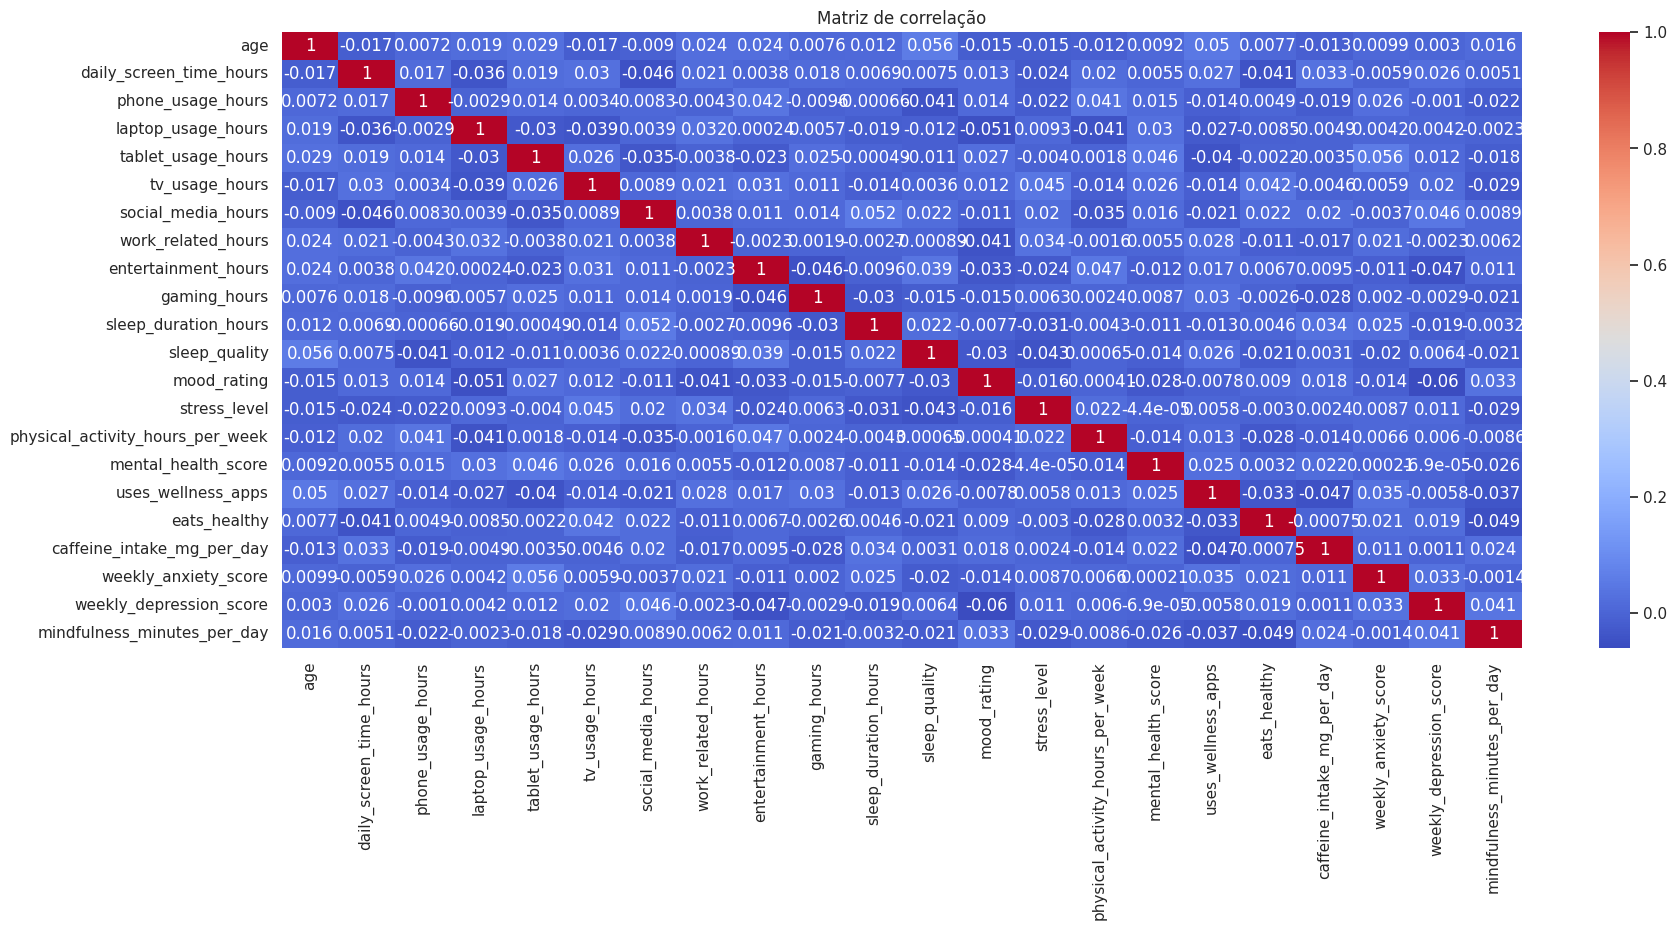

In [9]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de correlação")
plt.show()

# Distribuição dos gêneros dentro do dataset

<ipython-input-10-a8976a567428>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='cividis')


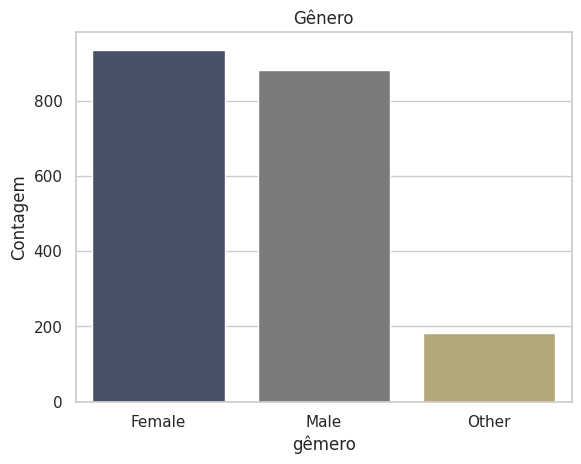

In [10]:
sns.countplot(x='gender', data=df, palette='cividis')
plt.title('Gênero')
plt.xlabel('gêmero')
plt.ylabel('Contagem')
plt.show()

# Pair plot de algumas variáveis

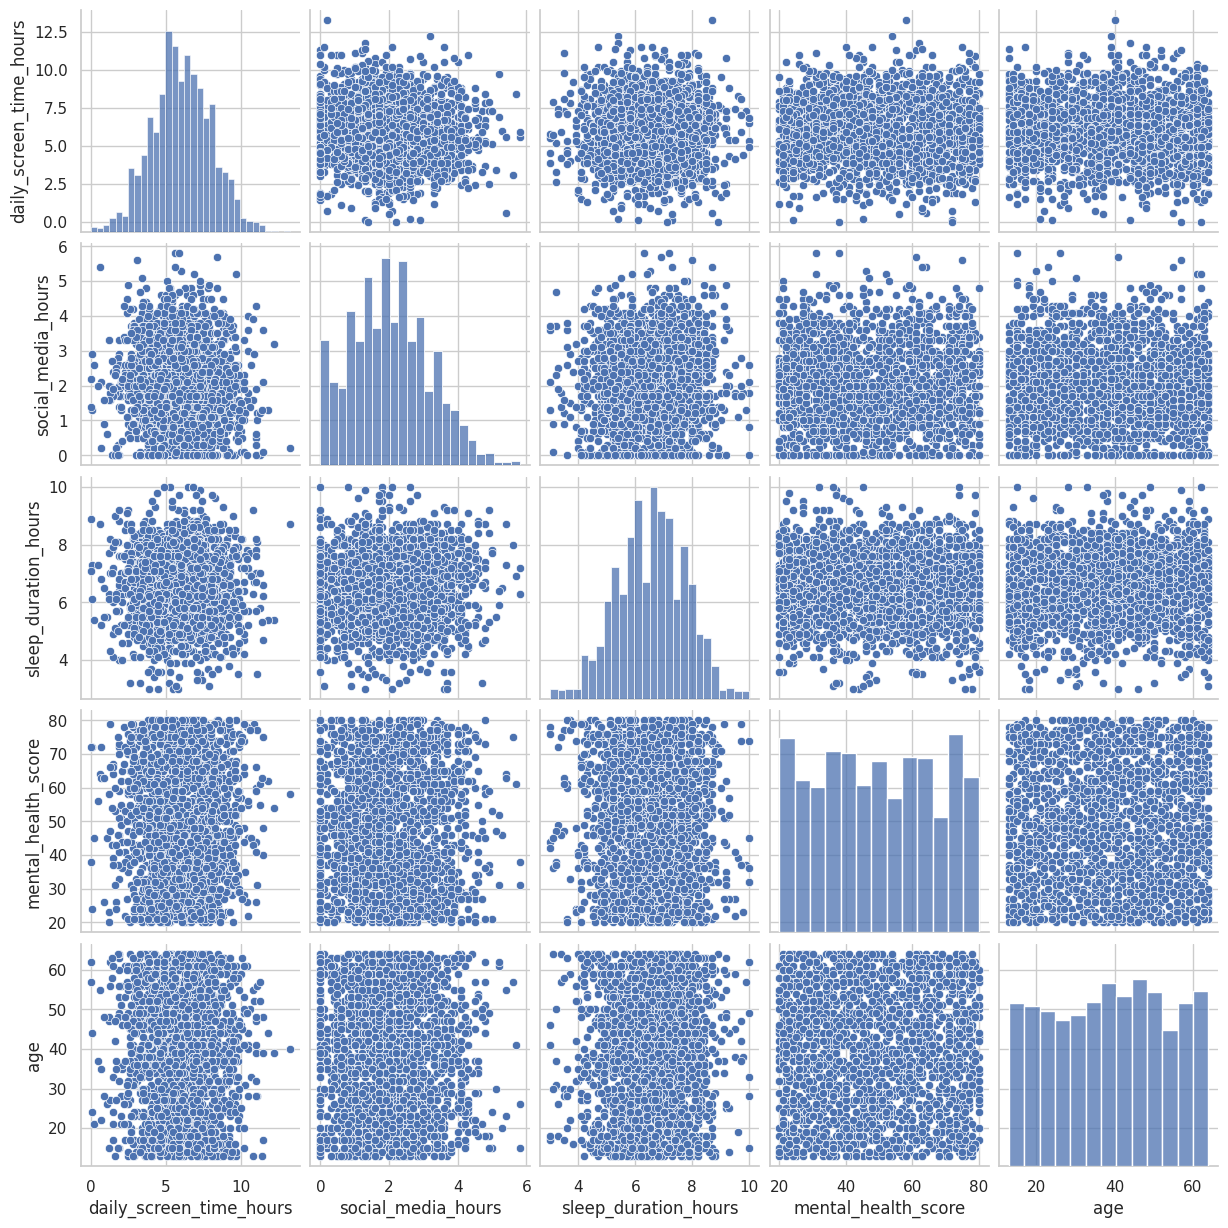

In [11]:
pairplot_cols = ['daily_screen_time_hours', 'social_media_hours', 'sleep_duration_hours', 'mental_health_score', 'age']
sns.pairplot(df[pairplot_cols].dropna())
plt.show()

# Tempo de tela por gênero

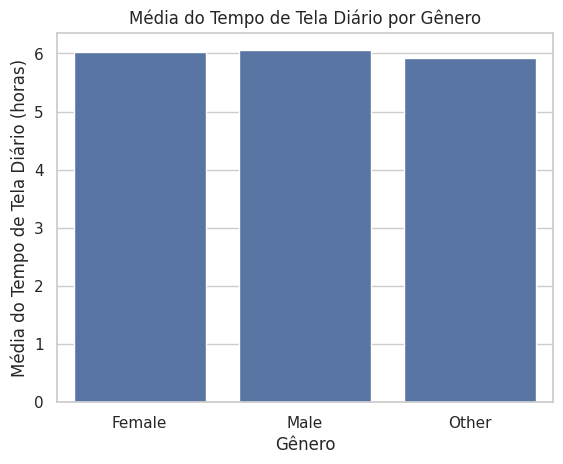

In [12]:
# Calcular a média do tempo de tela por gênero
media_tempo_tela_por_genero = df.groupby('gender')['daily_screen_time_hours'].mean().reset_index()

# Criar o gráfico de barras
sns.barplot(x='gender', y='daily_screen_time_hours', data=media_tempo_tela_por_genero)
plt.title('Média do Tempo de Tela Diário por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média do Tempo de Tela Diário (horas)')
plt.show()

# Idade x tempo telefone

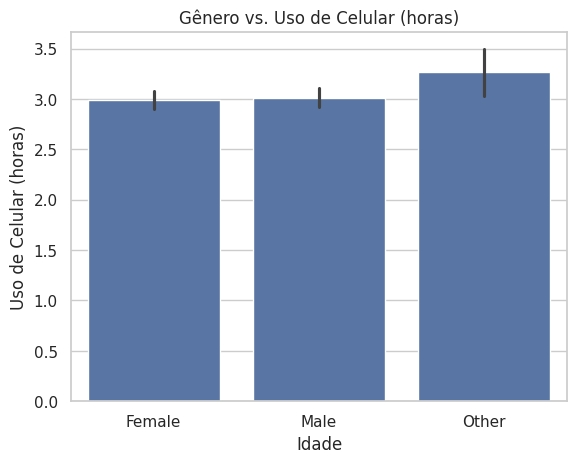

In [13]:
# Criar uma gráfico de barras
sns.barplot(x='gender', y='phone_usage_hours', data=df)
plt.title('Gênero vs. Uso de Celular (horas)')
plt.xlabel('Idade')
plt.ylabel('Uso de Celular (horas)')
plt.show()

# Faixa etária x tempo assistinfo TV
* Criar um agrupamento de faixas etárias
    * df.groupby('age_group')['tv_usage_hours']: Agrupa o DataFrame pela coluna
    * 'age_group' e seleciona a coluna 'tv_usage_hours'.
    * .mean(): Calcula a média do tempo de uso de TV para cada faixa etária.
    * .reset_index(): Converte o resultado de volta para um DataFrame.

* Criação do gráfico de barras:
    * sns.barplot(): Cria um gráfico de barras.
    * x='age_group': Define as faixas etárias no eixo x.
    * y='tv_usage_hours': Define a média de horas de uso de TV no eixo y.
    * data=tv_usage_by_age: Especifica o DataFrame com os dados agrupados.


<ipython-input-42-fb1f02d043d0>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  uso_tv_por_idade = df.groupby('age_group')['tv_usage_hours'].mean().reset_index()


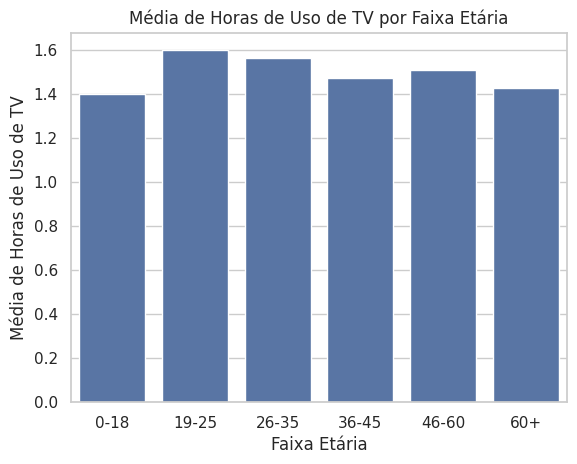

In [ ]:
# Definir as faixas etárias (se ainda não estiverem definidas)
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-60', '60+']
if 'age_group' not in df.columns:
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calcular o tempo médio de uso de TV por faixa etária
uso_tv_por_idade = df.groupby('age_group')['tv_usage_hours'].mean().reset_index()

# Criar o gráfico de barras
sns.barplot(x='age_group', y='tv_usage_hours', data=uso_tv_por_idade)
plt.title('Média de Horas de Uso de TV por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Média de Horas de Uso de TV')
plt.show()

<ipython-input-45-90feae298e43>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  uso_tv_por_idade = df.groupby('age_group')['gaming_hours'].mean().reset_index()


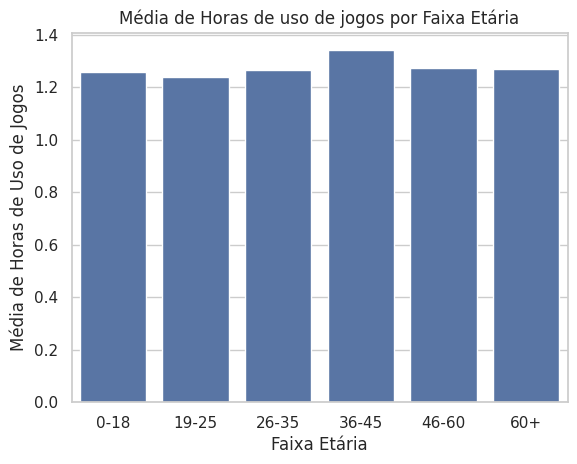

In [ ]:


# Definir as faixas etárias (se ainda não estiverem definidas)
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-60', '60+']
if 'age_group' not in df.columns:
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calcular o tempo médio de uso de TV por faixa etária
uso_tv_por_idade = df.groupby('age_group')['gaming_hours'].mean().reset_index()

# Criar o gráfico de barras
sns.barplot(x='age_group', y='gaming_hours', data=uso_tv_por_idade)
plt.title('Média de Horas de uso de jogos por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Média de Horas de Uso de Jogos')
plt.show()